In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})

In [2]:
# Use the below if on google collab

# from google.colab import files
# import io

# uploaded = files.upload()

# dataset = pd.read_csv(io.BytesIO(uploaded['bank_et2.csv']))
# Dataset is now stored in a Pandas Dataframe

dataset = pd.read_csv("bank_et2.csv", index_col=0)

In [3]:
dataset.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
dataset.tail()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1988.000000,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,no
freq,NaN,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,41.753018,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,12.724358,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


In [6]:
sns.pairplot

<function seaborn.axisgrid.pairplot>

In [7]:
print(dataset.isnull().sum())
print(dataset['job'].unique())
print(dataset['education'].unique())
print(dataset['contact'].unique())
print(dataset['poutcome'].unique())

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64
['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
['tertiary' 'secondary' nan 'primary']
['cellular' 'telephone' nan]
['failure' 'other' 'success' nan]


As we can see the following fields contain null values:
[age, job, education, contact, poutcome]
We will now explore these fields to explore how to deal with these missing values


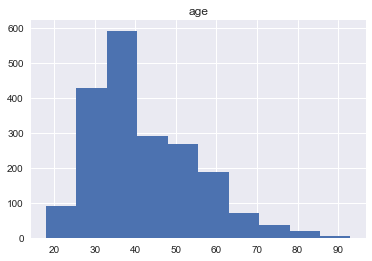

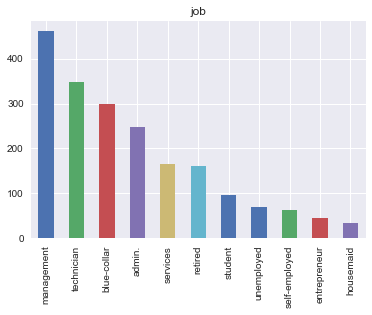

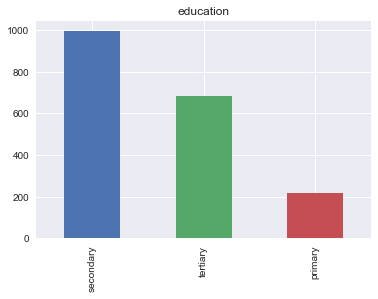

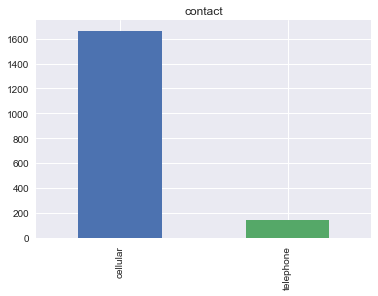

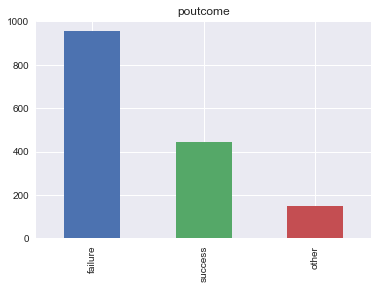

In [8]:
for col in ['age', 'job', 'education', 'contact', 'poutcome']:
    plt.title(col)
    if dataset[col].dtypes == 'object':
        dataset[col].value_counts().plot(kind='bar')
    else:
        dataset[col].hist()
    plt.show()


    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

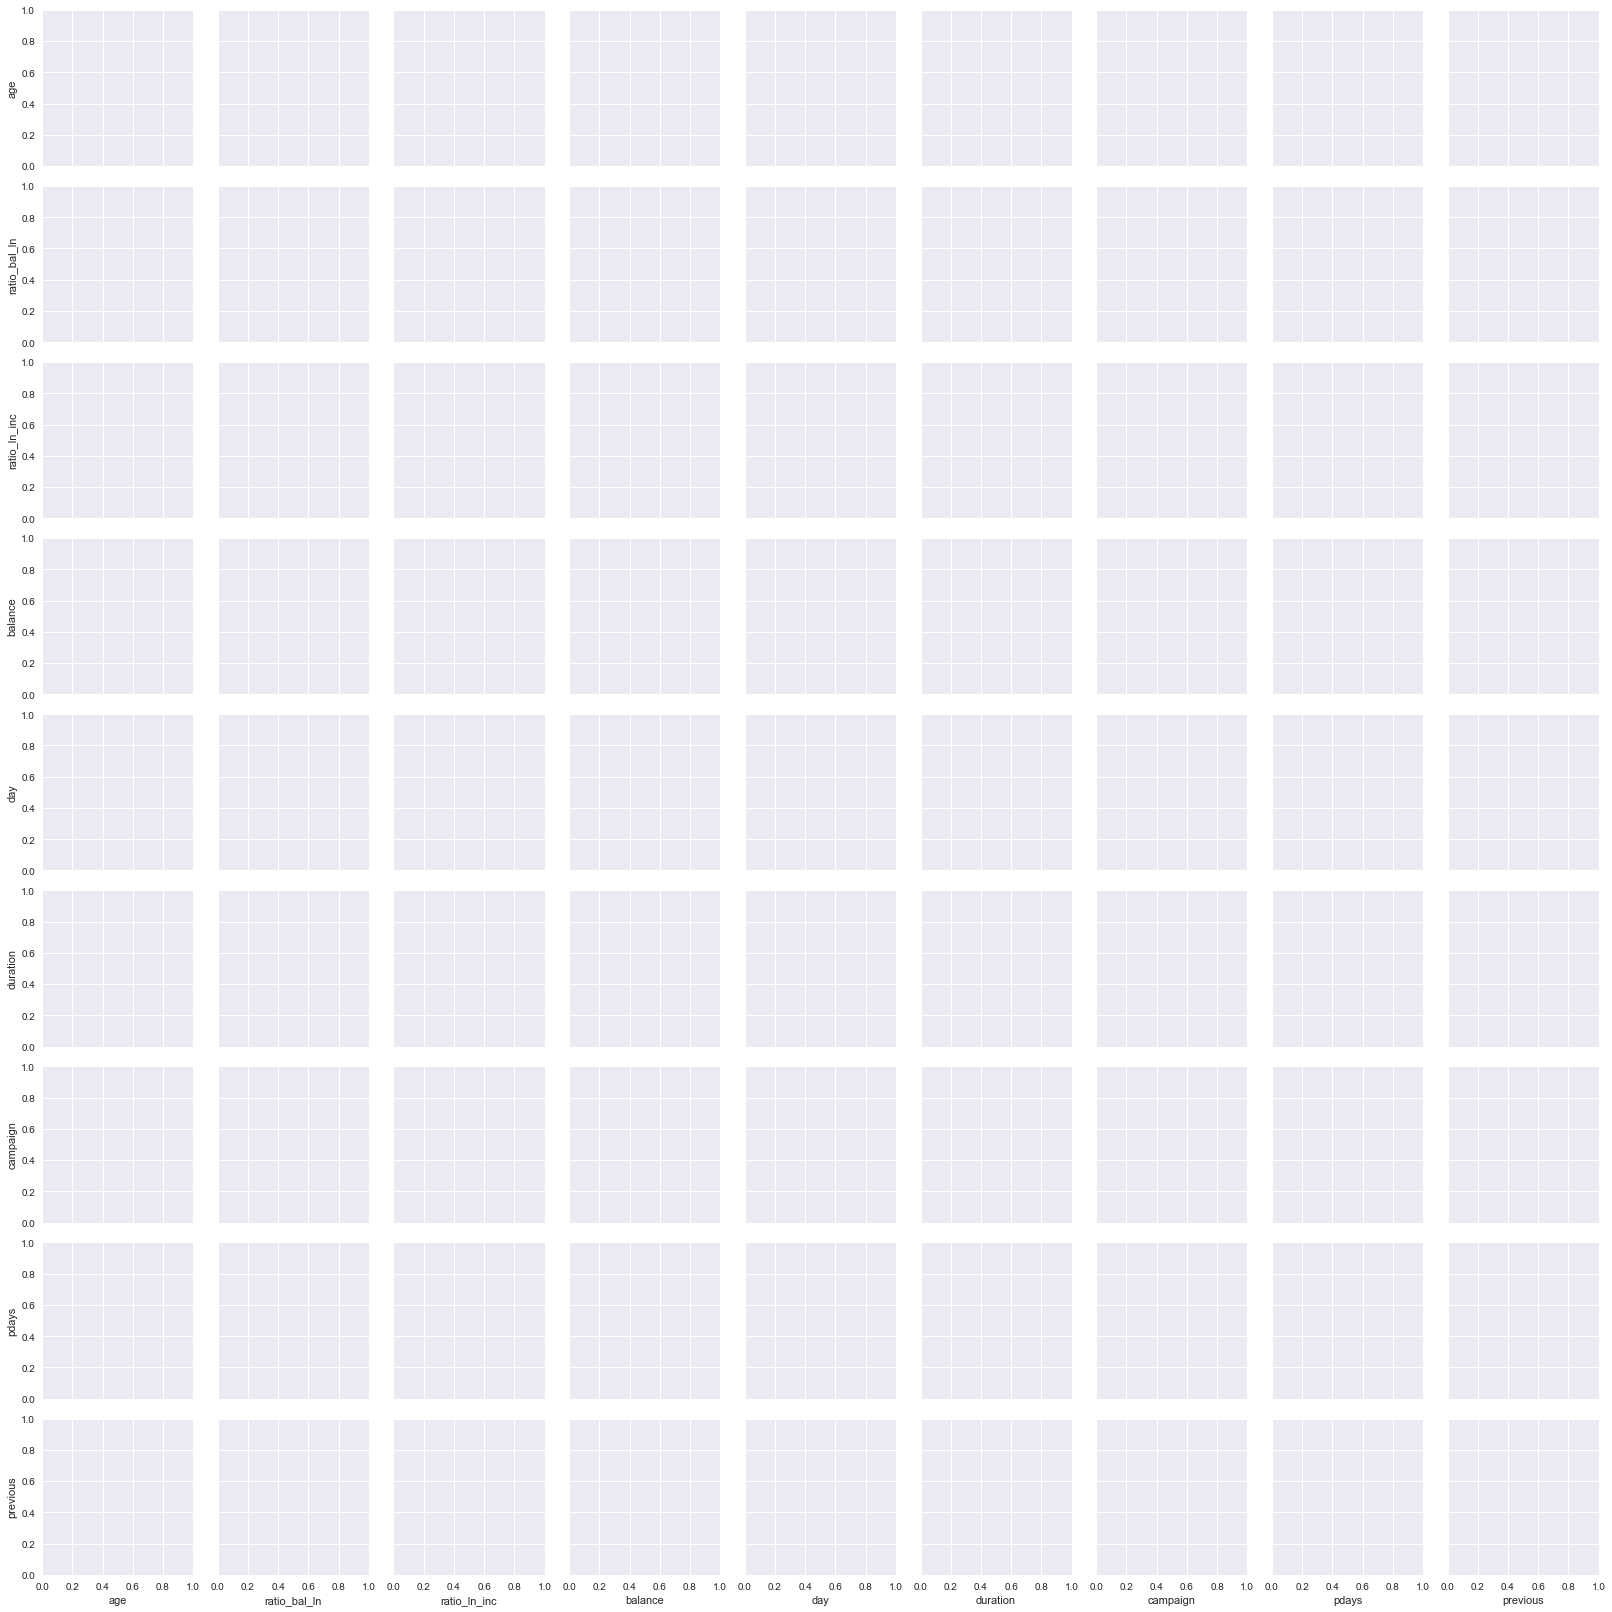

In [18]:
sns.pairplot(dataset, hue = 'education', vars=["age", "ratio_bal_ln", "ratio_ln_inc", "balance", "day", "duration","campaign","pdays","previous"])

In [9]:
print(dataset[dataset['poutcome'].isnull()]['pdays'].value_counts())
print(dataset[dataset['pdays']==-1]['poutcome'].values)

-1    454
Name: pdays, dtype: int64
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

As we can see poutcome null values are all records with -1 for previous calls therefore we will input a new value for these 'no_previous'

We will drop null values for age and job as they are so few samples it is unlikely to effect the final learning outcome

For contact we will inpute the values using a logistic regression and we will use a decision tree classifier to predict our missing values for education

In [10]:
df = dataset.dropna(subset=['age','job'])
df[['poutcome']] = df[['poutcome']].fillna(value='no_previous')
print(df.isnull().sum())

age               0
job               0
marital           0
education        99
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         190
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
cat_columns = df.select_dtypes(['object']).columns

for col in cat_columns:
    df[col] = df[col].astype('category')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
category_columns = df[cat_columns]
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,9,2,2,0,392,1.300134,0.473895,1,0,0,1,0,957,2,131,2,0,0
1,39.0,9,0,1,0,688,-0.193701,0.237021,1,1,0,1,0,233,2,133,1,0,0
2,59.0,5,1,1,0,1035,1.334266,0.121981,1,1,0,1,0,126,2,239,1,0,0
3,47.0,1,1,1,0,398,0.362286,1.251328,1,1,0,1,0,274,1,238,2,0,0
4,54.0,5,1,1,0,1004,0.072075,-0.533738,1,0,0,1,0,479,1,307,1,0,0


In [14]:
df_edu = df[df['education'] != -1]
df_contact = df[df['contact'] != -1]

X_edu = df_edu['',''].values
y_edu = df_edu['education'].values

X_cont = df_edu.drop('contact', axis=1).values
y_cont = df_edu['contact'].values

X_train, X_test, y_train, y_test = train_test_split(X_edu, y_edu, test_size=0.2)

edu_clf = DecisionTreeClassifier(max_depth=5)
edu_clf.fit(X_train, y_train)
print(edu_clf.score(X_train, y_train))
print(edu_clf.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_cont, y_cont, test_size=0.2)
cont_clf = LogisticRegression()
cont_clf.fit(X_train, y_train)
print(cont_clf.score(X_train, y_train))
print(cont_clf.score(X_test, y_test))

0.759148369926813
0.7367021276595744
0.9161676646706587
0.9069148936170213


In [15]:
## TODO apply classifier to the null values (-1 in the above dataframe)

In [16]:
df.describe()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,41.718402,4.659252,1.228008,1.133468,0.007078,1416.627907,0.246626,0.485655,0.482811,0.125379,-0.023256,13.852882,5.018200,291.335187,1.906471,167.739130,2.566229,1.040445,0.500506
std,12.718861,3.222042,0.627384,0.795398,0.083853,3146.990010,0.819581,1.076891,0.499831,0.331232,0.410368,9.707669,3.254921,220.787253,1.366130,131.483473,3.413637,1.198288,0.500126
min,18.000000,0.000000,0.000000,-1.000000,0.000000,-980.000000,-2.632068,-2.851405,0.000000,0.000000,-1.000000,1.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,199.000000,-0.306122,-0.276613,0.000000,0.000000,0.000000,5.000000,3.000000,146.000000,1.000000,75.000000,1.000000,0.000000,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,549.000000,0.224593,0.494409,0.000000,0.000000,0.000000,12.000000,4.000000,235.500000,1.000000,182.000000,2.000000,1.000000,1.000000
75%,50.000000,8.000000,2.000000,2.000000,0.000000,1634.750000,0.811690,1.213003,1.000000,0.000000,0.000000,23.000000,8.000000,374.000000,2.000000,251.000000,3.000000,2.000000,1.000000
max,93.000000,10.000000,2.000000,2.000000,1.000000,81204.000000,2.961979,4.046914,1.000000,1.000000,1.000000,31.000000,11.000000,1823.000000,11.000000,854.000000,55.000000,3.000000,1.000000


### Outliers

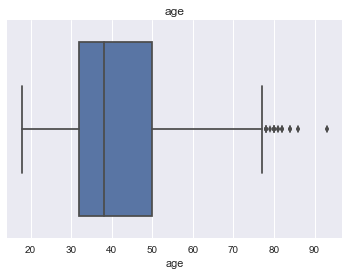

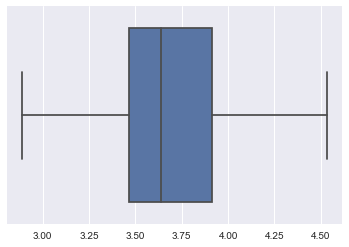

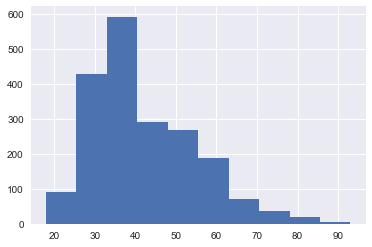

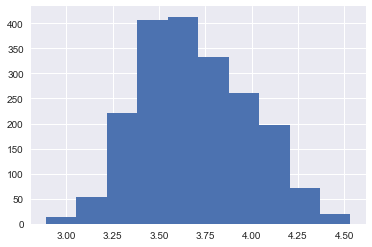

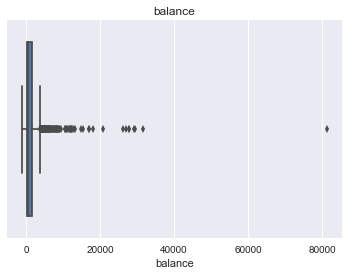

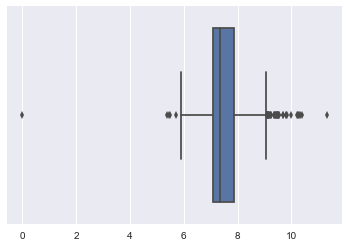

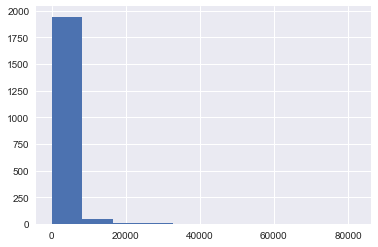

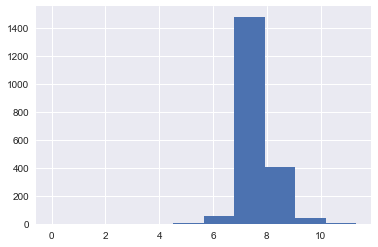

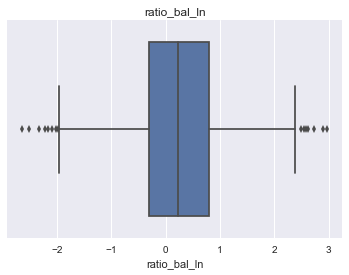

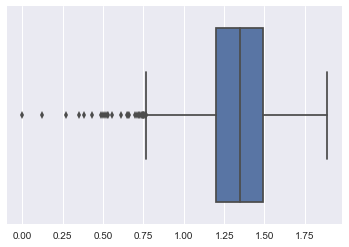

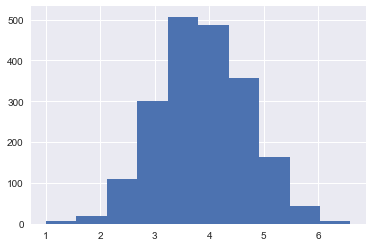

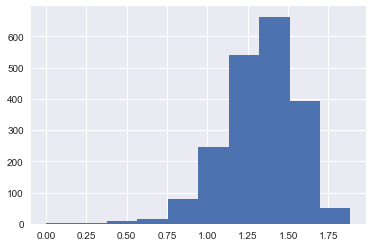

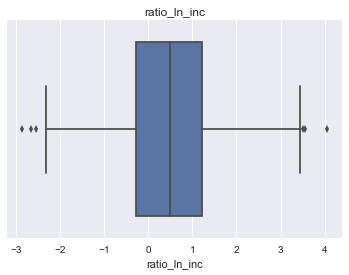

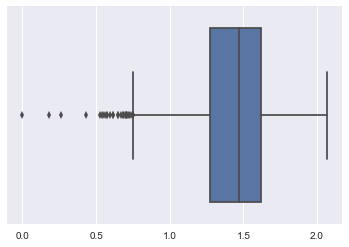

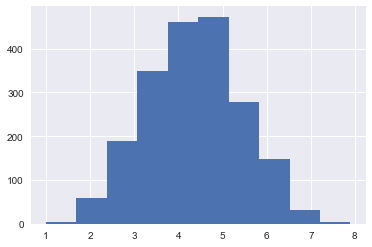

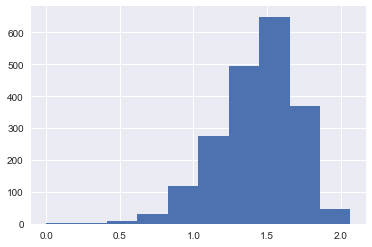

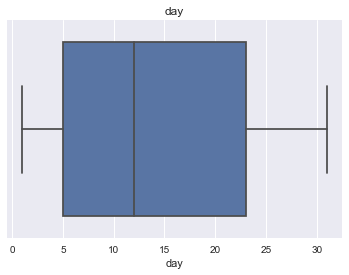

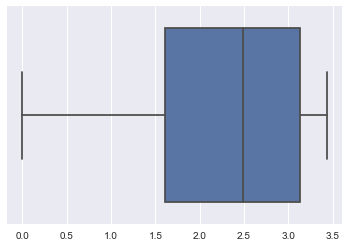

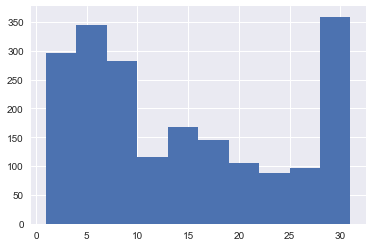

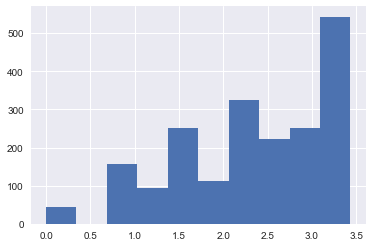

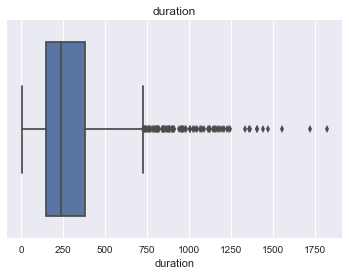

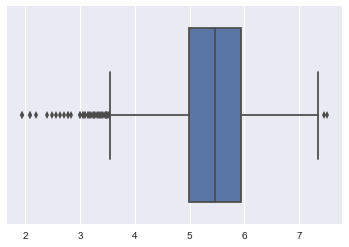

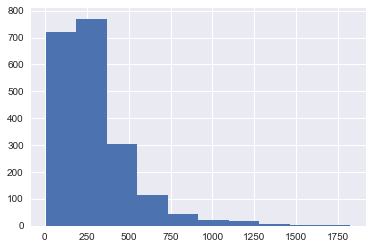

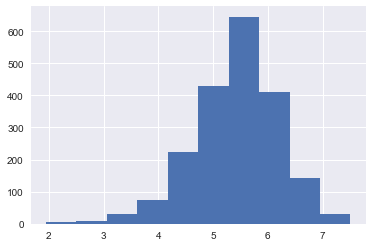

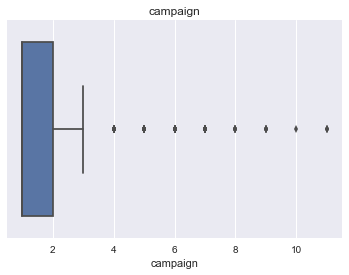

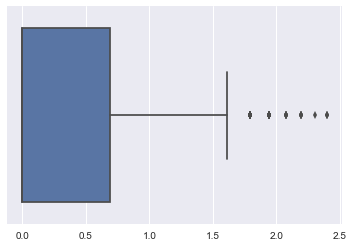

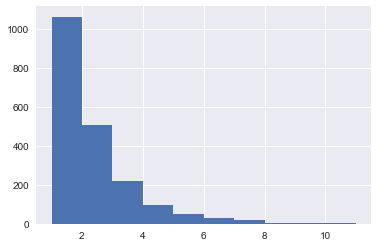

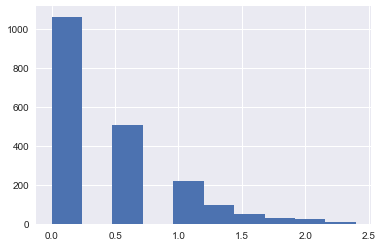

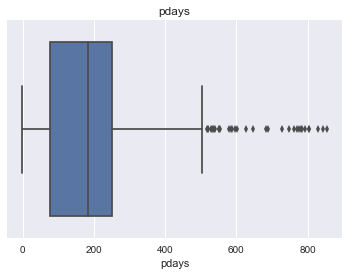

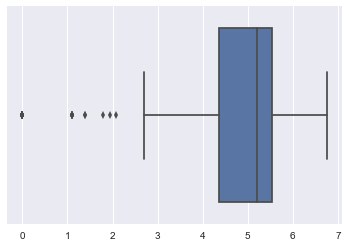

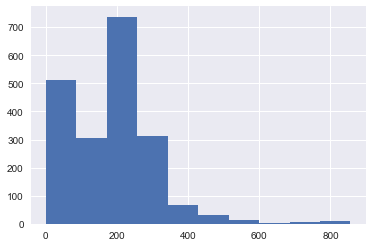

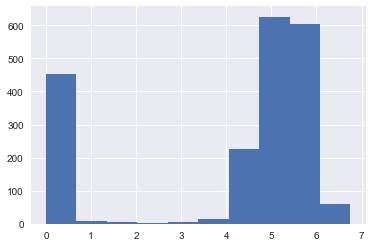

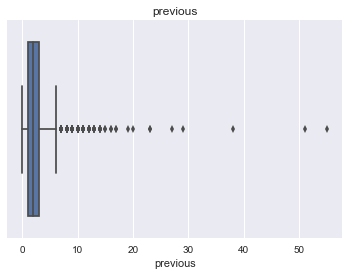

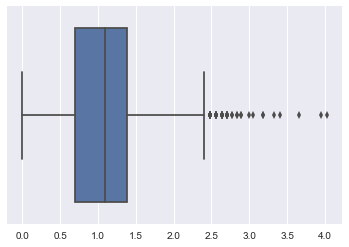

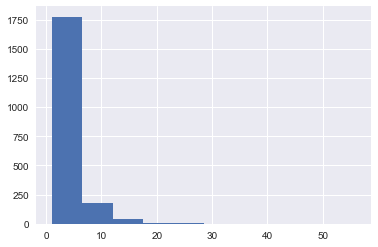

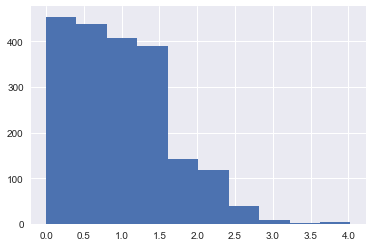

In [100]:
for col in dataset.select_dtypes('number').columns:
    plt.title(col)
    
    sns.boxplot(dataset[col].dropna())
    plt.show()
    if dataset[col].min() <= 0:
        data = dataset[col] + abs(dataset[col].min()) + 1
    else:
        data = dataset[col]
    sns.boxplot(boxcox(data.dropna(), 0))
    plt.show()
    plt.hist(data.dropna())
    plt.show()
    plt.hist(boxcox(data.dropna(), 0))
    plt.show()


I have examined the distribution of values for all numeric columns,
I noted that application of boxcox transformation removed many outliers and resulted in a more normal distribution for: age, balance and  duration

for examples with relativel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:1030: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


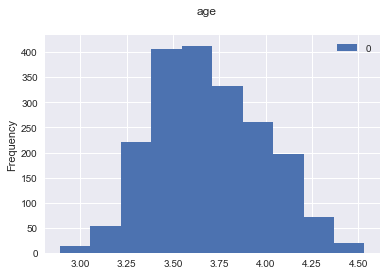

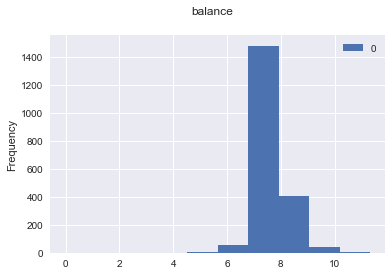

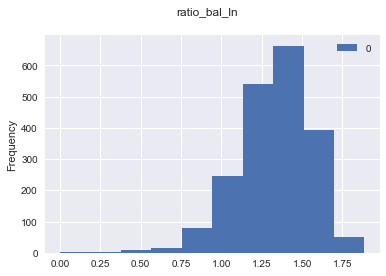

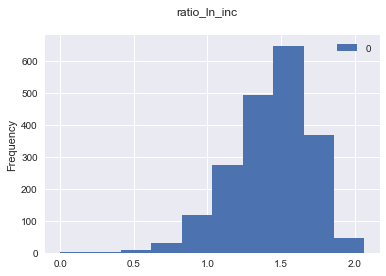

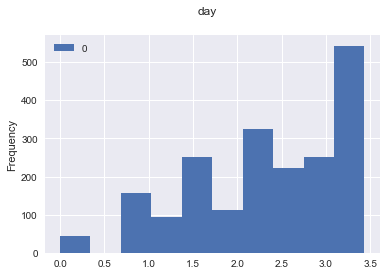

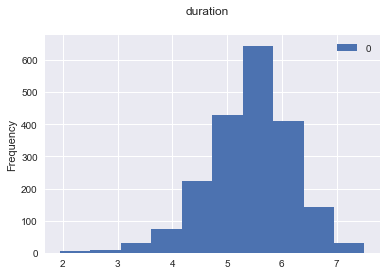

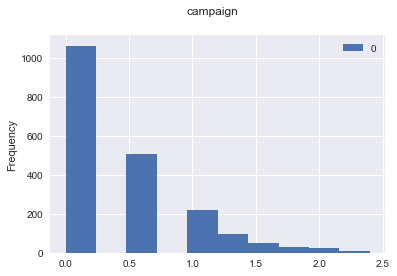

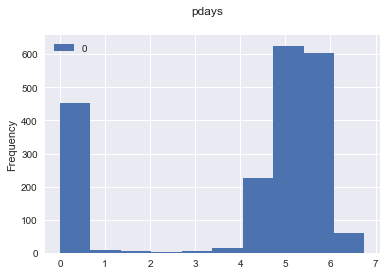

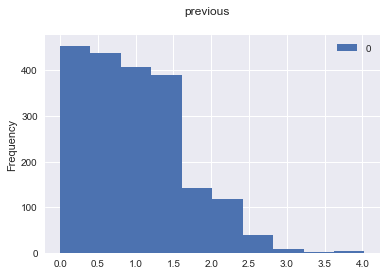

In [87]:
from scipy import stats


for col in dataset.select_dtypes('number').columns: 
    if dataset[col].min() <= 0:
        data = dataset[col] + abs(dataset[col].min()) + 1
    else:
        data = dataset[col]
    pd.DataFrame(boxcox(data, 0)).dropna().plot(kind='hist',subplots=True,sharex=True,sharey=True,title=col)
